In [1]:
from sklearn.datasets import make_blobs
X ,y = make_blobs(n_samples = 150, n_features = 2, centers = 3, cluster_std = 0.5, shuffle = True, random_state = 0)

In [2]:
print(X[:5,:])

[[2.60509732 1.22529553]
 [0.5323772  3.31338909]
 [0.802314   4.38196181]
 [0.5285368  4.49723858]
 [2.61858548 0.35769791]]


In [3]:
print(y[:5])

[1 0 0 0 1]


In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], marker = 'o', s = 50)
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, n_init = 10, max_iter = 300, tol = 1e-04, random_state  = 0)
y_km = km.fit_predict(X)

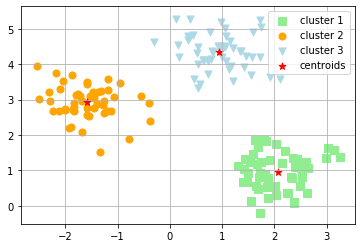

In [6]:
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s = 50, c = 'lightgreen', marker = 's', label = 'cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s = 50, c = 'orange', marker  = 'o', label = 'cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s = 50, c = 'lightblue', marker = 'v', label = 'cluster 3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 50, c = 'red', marker = '*', label = 'centroids')
plt.legend(scatterpoints = 1)
plt.grid()

In [7]:
distortions = []
for i in range (1,11):
    km = KMeans(n_clusters = i, n_init = 10, max_iter = 300, random_state = 0)
    km.fit(X)
    distortions.append(km.inertia_)

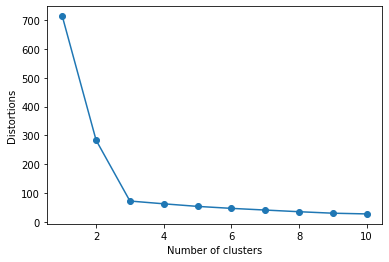

In [8]:
plt.plot(range(1,11), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.show()

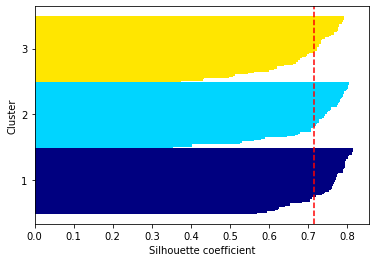

In [9]:
km = KMeans(n_clusters=3, init='k-means++',n_init=10, max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(X)
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height = 1.0, edgecolor = 'none', color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle= "--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

In [10]:
import pandas as pd
import numpy as np
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X, columns= variables, index= labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [11]:
from scipy.spatial.distance import pdist, squareform
row_dist  = pd.DataFrame(squareform(pdist(df, metric = 'euclidean')), columns = labels, index = labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [12]:
from scipy.cluster.hierarchy import linkage
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
row_clusters

array([[0.        , 4.        , 3.83539555, 2.        ],
       [1.        , 2.        , 4.34707339, 2.        ],
       [3.        , 5.        , 5.89988504, 3.        ],
       [6.        , 7.        , 8.31659367, 5.        ]])

In [13]:
pd.DataFrame(row_clusters, columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'], index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


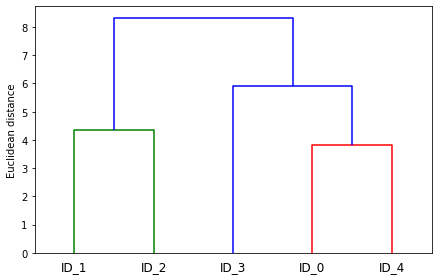

In [14]:
from scipy.cluster.hierarchy import dendrogram
row_dendr = dendrogram(row_clusters, labels = labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

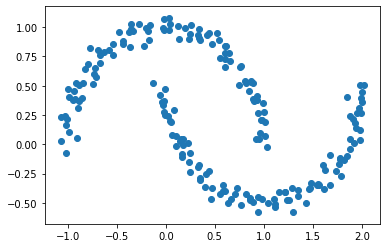

In [15]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)
plt.scatter(X[:,0], X[:,1])
plt.show()